In [1]:
%load_ext autoreload
%autoreload 2

# import os
# os.environ['NUMBA_DISABLE_JIT'] = '1'

In [2]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import run_to_steady_state, get_straub_fig10_data, get_straub_fig10_init
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np
from PySDM.physics.constants import si
import pickle as pkl
import time

In [3]:
(straub_x, straub_log_y) = get_straub_fig10_data()
(straub_x_init, straub_y_init) = get_straub_fig10_init()

Success with run #1
Success with run #2
Success with run #3
Success with run #4
Success with run #5
ran Straub2010 for 256 superdroplets in 66.21643376350403 sec
Success with run #1
Success with run #2
Success with run #3
Success with run #4
Success with run #5
ran Straub2010 for 1024 superdroplets in 69.66627192497253 sec
Success with run #1
Success with run #2
Success with run #3
Success with run #4
Success with run #5
ran Straub2010 for 4096 superdroplets in 83.65771007537842 sec


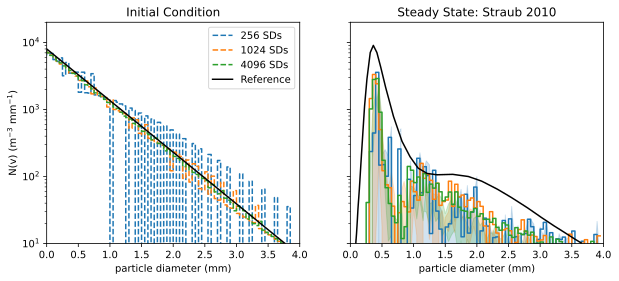

HTML(value="<a href='./straub_fig10.pdf' target='_blank'>./straub_fig10.pdf</a><br>")

In [8]:
run_sims = True
n_sds = [2**8, 2**10, 2**12]
steps = [0, 7200]
nruns = 5

fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)

# Obtain data
parameterization = 'Straub2010'
for n_sd in n_sds:
    if run_sims:
        t1 = time.time()
        run_to_steady_state(parameterization, n_sd, steps, nruns, dt=2*si.s)
        t2 = time.time()
        print('ran '+parameterization+' for '+str(n_sd)+' superdroplets in '+str(t2 - t1)+' sec')
    data_filename = 'data/steadystate_' + parameterization + '_' + str(n_sd) + 'sd.pkl'
    with open(data_filename, 'rb') as handle:
        (x,y_ensemble,rates) = pkl.load(handle)
    
    # statistics
    y_mean = np.nanmean(y_ensemble, axis=0)
    y_std = np.nanstd(y_ensemble, axis=0)

    # Plotting
    cmap = matplotlib.cm.get_cmap('viridis')
    dr = np.diff(x) * si.um
    dr = np.concatenate([dr, [dr[-1]]])

    legend_entries = []

    color = next(ax[0]._get_lines.prop_cycler)['color']
    for (j, step) in enumerate(steps):  # pylint: disable=protected-access
        if step != 0:
            lbl = str(n_sd) + ' SDs'
            ax[1].step(2*x/1000,y_mean[j]/2/dr * si.mm,linestyle='-',color=color,
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            ax[1].fill_between(2*x/1000, y_mean[j]/2/dr * si.mm - y_std[j]/2/dr * si.mm, 
                               y_mean[j] * si.mm + y_std[j]/2/dr * si.mm, color=color, alpha=0.2)
        else:
            lbl = str(n_sd) + ' SDs'
            ax[0].step(2*x/1000,y_mean[j]/2/dr * si.mm,linestyle='--',color=color,
                    label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
            # ax[0].fill_between(2*x/1000, y_mean[j]/2 * si.mm - y_std[j]/2/dr * si.mm, 
            #                    y_mean[j]/2 * si.mm + y_std[j]/2/dr * si.mm, color=color, alpha=0.2)
            
# Reference data
ax[0].plot(straub_x_init/si.mm, straub_y_init, color='k', label='Reference')
ax[1].plot(straub_x, np.power(10, straub_log_y) ,color='k', label='Reference')

ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xlim([0.0, 4.0])
ax[1].set_xlim([0.0, 4.0])
ax[0].set_ylim([10.0, 2e4])
ax[1].set_ylim([10.0, 2e4])
ax[0].set_xlabel("particle diameter (mm)")
ax[1].set_xlabel("particle diameter (mm)")
ax[0].set_ylabel("N(v) (m$^{-3}$ mm$^{-1})$")
ax[0].legend()
ax[0].set_title("Initial Condition")
ax[1].set_title("Steady State: Straub 2010")
show_plot('straub_fig10.pdf')

In [5]:
y_mean[j] * si.mm

array([0.00000000e+00, 4.08427382e+01, 7.09805958e+00, 3.03962913e-01,
       1.08005089e+00, 0.00000000e+00, 1.68726793e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.16783800e-03, 1.18941400e-03, 4.86472000e-04, 0.00000000e+00,
       1.11676280e-02, 7.58131900e-03, 1.01513990e-02, 0.00000000e+00,
       0.00000000e+00, 7.62943500e-03, 0.00000000e+00, 1.89569900e-03,
       0.00000000e+00, 5.39606400e-03, 5.95984400e-03, 0.00000000e+00,
       1.21607000e-04, 2.69700200e-03, 5.16788900e-03, 1.99005400e-03,
       0.00000000e+00, 4.28303100e-03, 0.00000000e+00, 9.02018800e-03,
       0.00000000e+00, 6.08713000e-03, 4.79782000e-04, 2.56758900e-03,
       0.00000000e+00, 2.06683000e-03, 2.05539000e-04, 3.93483000e-04,
       3.48472500e-03, 9.13068000e-04, 1.03863500e-03, 1.32627300e-03,
      